# Minst 手写数字识别

In [196]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data

In [197]:
# 获取 Mints手写数字数据集
mnist = input_data.read_data_sets("Data/MNIST_data/", one_hot=True)

Extracting Data/MNIST_data/train-images-idx3-ubyte.gz
Extracting Data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting Data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting Data/MNIST_data/t10k-labels-idx1-ubyte.gz


In [198]:
# 训练集 train 数量：55000，验证集 validation 数量：5000，测试集 test 数量：10000
print("训练集 train 数量：", mnist.train.num_examples)
print("训练集 validation 数量：", mnist.validation.num_examples)
print("训练集 test 数量：", mnist.test.num_examples)

训练集 train 数量： 55000
训练集 validation 数量： 5000
训练集 test 数量： 10000


In [199]:
# 数据集中的数据实际上是每张为28 * 28 = 784的图片
print("训练集 train shape：", mnist.train.images.shape)
print("训练集 label shape：", mnist.train.labels.shape)

训练集 train shape： (55000, 784)
训练集 label shape： (55000, 10)


In [200]:
# 查看一副image的数据
print("image_data: ", mnist.train.images[0])

image_data:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.       

In [201]:
print(len(mnist.train.images[0]))

784


In [202]:
# 重塑一副image
mnist.train.images[0].reshape(28, 28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [203]:
# 可视化image
def plot_image(image):
    plt.imshow(image.reshape(28, 28), cmap="binary")
    plt.show()

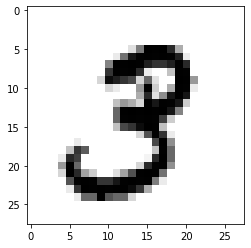

In [204]:
plot_image(mnist.train.images[1])

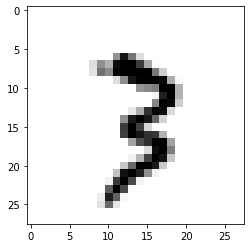

In [205]:
plot_image(mnist.train.images[20000])

## 进一步了解reshape()

In [206]:
int_array = np.array([i for i in range(64)])

print(int_array)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]


In [207]:
# 转换成8行8列（8 * 8）的数组
int_array.reshape(8, 8)

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55],
       [56, 57, 58, 59, 60, 61, 62, 63]])

In [208]:
# 转换成4行16列（4 * 16）的数组
int_array.reshape(4, 16)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]])

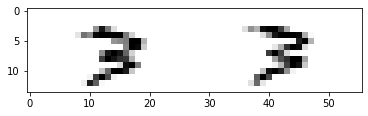

In [209]:
plt.imshow(mnist.train.images[20000].reshape(14, 56), cmap="binary")
plt.show()

## 独热编码

In [210]:
# 此处表示当前训练集为1号的image的对应标签为3
mnist.train.labels[1]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

## 读取验证数据

In [211]:
print("validation images: ", mnist.validation.images.shape)
print("validation labels: ", mnist.validation.labels.shape)

validation images:  (5000, 784)
validation labels:  (5000, 10)


## 读取测试数据

In [212]:
print("test images: ", mnist.test.images.shape)
print("test labels: ", mnist.test.labels.shape)

test images:  (10000, 784)
test labels:  (10000, 10)


## 数据的批量读取

In [213]:
# next_batch()会先对数据集进行shuffle操作
batch_image_xs, batch_labels_ys = mnist.train.next_batch(batch_size=10)

In [214]:
print(mnist.train.labels[0:10])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [215]:
print(batch_labels_ys)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


## 模型参数定义

In [216]:
# 定义待输入数据占位符
# 每张图片共有28*28共784个像素点
x = tf.placeholder(tf.float32, [None, 784], name="X")

# 0-9 共10个数字 => 共10个类别
y = tf.placeholder(tf.float32, [None, 10], name="Y")

In [217]:
# 定义变量
# 以正态分布的随机数初始化权重W，以常数0初始化偏置项b
W = tf.Variable(tf.random_normal([784, 10], name="W"))
b = tf.Variable(tf.zeros([10]), name="b")

## 进一步了解tf.random_normal()

In [218]:
# 生成100个随机数
norm = tf.random_normal([100])
with tf.Session() as sess:
    norm_data = norm.eval()

print(norm_data[:10])

[-0.67116475  0.7913417  -0.09613395  0.06218862 -0.22907373  0.3838432
 -0.52225363 -1.6810652  -0.51752365 -0.28294846]


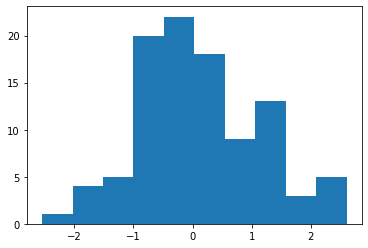

In [219]:
# 输出图像
plt.hist(norm_data)
plt.show()

## 定义前向计算

In [220]:
# 前向计算
forward = tf.matmul(x, W) + b

# Softmax结果分类
pred = tf.nn.softmax(forward)

## 进一步了解Softmax函数

In [221]:
x_study = np.array([[-3.1, 1.8, 9.7, -2.5]])
pred_study = tf.nn.softmax(x_study)

sess_study = tf.Session()
v = sess_study.run(pred_study)
print(v)

sess_study.close()

[[2.75972792e-06 3.70603254e-04 9.99621608e-01 5.02855213e-06]]


## 定义损失函数

In [222]:
# 此处使用交叉熵损失函数（本例为解决逻辑回归问题，不适合使用均方差损失函数）
# 交叉熵损失函数计算公式：Loss = -∑(上：n, 下：i=1) y(下标：i)log[y(下标：i)']
loss_function = tf.reduce_mean(-tf.reduce_sum(y * tf.log(pred),
                                              reduction_indices=1))

## 定义训练参数

In [223]:
# 采用小批量梯度下降法进行训练

# 训练轮次
train_epochs = 50

# 单次训练样本数（批次大小）
batch_size = 10

# 一轮训练有多少批次
total_batch = int(mnist.train.num_examples / batch_size)

# 显示粒度
display_step = 1

# 学习率
learning_rate = 0.01

## 定义优化器

In [224]:
# 梯度下降优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

## 定义准确率

In [225]:
# 检查预测类别与实际类别的匹配情况
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

In [226]:
# 准确率，将布尔值转化为浮点数，并计算平均值
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [227]:
session = tf.Session()

# 变量初始化
init = tf.global_variables_initializer()

session.run(init)

## 模型训练

In [228]:
# 开始训练
for epoch in range(train_epochs):
    for batch in range(total_batch):
        # 读取批次数据
        xs, ys = mnist.train.next_batch(batch_size)

        # 执行批次训练
        session.run(optimizer, feed_dict={x: xs, y: ys})

    # 批次训练完成后，使用验证数据计算误差与准确率，验证集没有分批
    loss, acc = session.run([loss_function, accuracy],
                            feed_dict={x: mnist.validation.images, y: mnist.validation.labels})

    # 打印训练中的详细信息
    if (epoch + 1) % display_step == 0:
        print("Train epoch: ", "%02d" % (epoch + 1),
              "Loss = ", "{:.9f}".format(loss),
              "Accuracy = ", "{:.4f}".format(acc))

print("Train Finished! ")

Train epoch:  01 Loss =  1.233766556 Accuracy =  0.7468
Train epoch:  02 Loss =  0.900387108 Accuracy =  0.8082
Train epoch:  03 Loss =  0.769903600 Accuracy =  0.8314
Train epoch:  04 Loss =  0.686057031 Accuracy =  0.8478
Train epoch:  05 Loss =  0.633525312 Accuracy =  0.8552
Train epoch:  06 Loss =  0.595018923 Accuracy =  0.8648
Train epoch:  07 Loss =  0.565494120 Accuracy =  0.8678
Train epoch:  08 Loss =  0.542117000 Accuracy =  0.8756
Train epoch:  09 Loss =  0.521325886 Accuracy =  0.8788
Train epoch:  10 Loss =  0.506930888 Accuracy =  0.8808
Train epoch:  11 Loss =  0.492020398 Accuracy =  0.8830
Train epoch:  12 Loss =  0.479584873 Accuracy =  0.8864
Train epoch:  13 Loss =  0.469210446 Accuracy =  0.8862
Train epoch:  14 Loss =  0.459723622 Accuracy =  0.8910
Train epoch:  15 Loss =  0.452287793 Accuracy =  0.8918
Train epoch:  16 Loss =  0.443930358 Accuracy =  0.8944
Train epoch:  17 Loss =  0.435354352 Accuracy =  0.8934
Train epoch:  18 Loss =  0.429197460 Accuracy = 

## 评估模型

In [229]:
# 使用测试集进行评估
accu_test = session.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels})

print("Test Accuracy: ", accu_test)

Test Accuracy:  0.9078


In [230]:
# 再次使用验证集进行评估
accu_test = session.run(accuracy, feed_dict={x: mnist.validation.images, y: mnist.validation.labels})

print("Test Accuracy: ", accu_test)

Test Accuracy:  0.9114


In [231]:
# 再次使用训练集进行评估
accu_test = session.run(accuracy, feed_dict={x: mnist.train.images, y: mnist.train.labels})

print("Test Accuracy: ", accu_test)

Test Accuracy:  0.91401815


## 模型运用

In [232]:
# 由于预测结果是one-hot编码格式，所以需要转化为0~9的数字
prediction_result = session.run(tf.argmax(pred, 1), feed_dict={x: mnist.test.images})

In [233]:
# 查看预测结果中的前10项
prediction_result[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=int64)

## 模型可视化

In [237]:
# 定义可视化函数
def plot_images_labels_prediction(
        images,  # 图像列表
        labels,  # 标签列表
        prediction,  # 预测值列表（若传入空表则为展示数据集中image与对应标签）
        index,  # 从第index个开始显示
        num=10,  # 缺省一次显示10幅
):
    # 获取当前图表
    flg = plt.gcf()

    # 1英寸等于2.54cm
    flg.set_size_inches(10, 12)

    # 最多展示25个要处理的子图
    if num > 25:
        num = 25

    for i in range(0, num):
        # 获取当前要处理的子图
        ax = plt.subplot(5, 5, i + 1)

        # 显示第index个图像
        ax.imshow(np.reshape(images[index], (28, 28), ), cmap="binary")

        # 构建该图上要显示的title信息
        title = "Label = " + str(np.argmax(labels[index]))

        if len(prediction) > 0:
            title += ", Pred = " + str(prediction[index])

        ax.set_title(title, fontsize=10)

        index += 1

    plt.show()

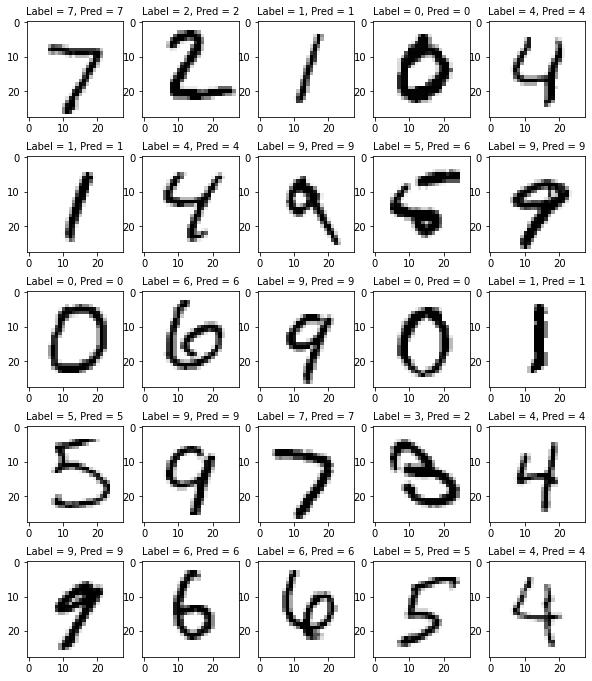

In [240]:
plot_images_labels_prediction(
    mnist.test.images,
    mnist.test.labels,
    prediction_result,
    0,
    25
)